In [1]:
from IPython.display import display

# MNIST

The MNIST dataset contains 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents. MNIST is often called the "Hello World" of Machine Learning.

Scikit-Learn provides many helper functions to download popular datasets. MNIST is one of them. The following fetches the MNIST dataset:

## Import

In [2]:
# Importing data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
# Print the data
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

### Structure

Datasets loaded by Scikit-Learn generally have a similar dictionary structure including:
* A `DESCR` key describing the dataset
* A `data` key containing an array with one row per instance and one column per feature
* A `target` key containing an array with the labels


In [3]:
# Store the data in X and y vars -- the features and the target
X, y = mnist["data"], mnist["target"]
print(f'X.shape: {X.shape}') # No. of rows x no. of cols
print(f'y.shape: {y.shape}') # No. of rows

print(f'The X (features) is a {type(X)}')
print(f'The y (target) is a {type(y)}')

X.shape: (70000, 784)
y.shape: (70000,)
The X (features) is a <class 'pandas.core.frame.DataFrame'>
The y (target) is a <class 'pandas.core.series.Series'>


### Display

There are 70,000 images, and each image has 784 features. This is because each image is $28 \times 28$ pixels, and each feature simply represents one pixel's intensity, from 0 (white) to 255 (black). Let's take a peek at one digit from the dataset. All you need to do is grab an instance's feature vector, reshape it to a $28 \times 28$ array, and display it using Matplotlib's `imshow()` function.

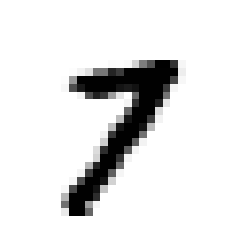

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

digit_7 = X[40000:40001]

digit_7_image = digit_7.to_numpy().reshape(28, 28) # to_numpy allows for reshaping

plt.imshow(digit_7_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [5]:
# Show image, get the image label
X[40000:40001]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
40000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Creating a Test Set

MNIST is actually already split into training and test set. The first 60,000 images are the training set, and the last 10,000 images are the test set.


In [6]:
# Get the training and testing data
# The first 60,000 images are the training set
# The last 10,000 images are the test set
X_train, y_train = X[:60000], y[:60000]

print(f'X_train')
display(X_train)
print(f'y_train')
display(y_train.to_frame())


X_train


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


y_train


,class
0,5
1,0
2,4
3,1
4,9
...,...
59995,8
59996,3
59997,5
59998,6


In [7]:
X_test, y_test = X[60000:], y[60000:]

print(f'X_test')
display(X_test)
print(f'y_test')
display(y_test.to_frame())

X_test


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
60000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


y_test


,class
60000,7
60001,2
60002,1
60003,0
60004,4
...,...
69995,2
69996,3
69997,4
69998,5


In [8]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

### Shuffling

Let's also shuffle the training set, guaranteeing that all cross-validation folds will be similar (you don't want one fold to be missing some digits). Also, some learning algorithms are sensitive to the order of the training instances, and they perform poorly if they get many similar instances in a row. Shuffling the dataset ensures that this won't happen.

In [9]:
import numpy as np
np.random.seed(42)

# https://numpy.org/doc/stable/reference/random/generated/numpy.random.permutation.html
shuffle_index = np.random.permutation(60000)

print(f'Shuffled Index: {shuffle_index}')

X_train, y_train = X_train.iloc[shuffle_index], y_train[shuffle_index]

Shuffled Index: [12628 37730 39991 ...   860 15795 56422]


# Training a Binary Classifier

Let's simplify for now and only try to identify one digit--for example the number 9.

The "9-detector" is an example of a *binary classifier*, capable of distinguishing between just two classes, 9 and not-9. Let's create the target vectors for this classification task.

In [10]:
y_train_7 = (y_train == 7)
y_test_7 = (y_test == 7)

## Stochastic Gradient Descent (SGD)

A good place to start is with a *Stochastic Gradient Descent (SGD)* using Scikit-Learn's `SGDClassifier` class. The classifier has the advantage of being capable of handling very large datasets efficiently. This is, in part, because SGD deals with training instances independently, one at a time, which also makes SGD well suited for *online learning*. Let's create an `SGDClassifier` and train it on the whole training set.

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_7)

SGDClassifier(random_state=42)

### Random State

The `SGDClassifier` relies on randomness during training (hence the name "stochastic"). If you want reproducible results you should set the `random_state` parameter.
Now, this can be used to detect images of the number 9.

In [12]:
digit_7

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
40000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
sgd_clf.predict(digit_7)

array([ True])

## Performance Measures

Evaluating a classifier is often significantly trickier than evaluating a regressor, so we will spend a large part of this chapter on this topic. 

### Implementing Cross-Validation

Occasionally you need more control over the cross-validaiton process than what `cross_val_score()` and similar functions provide. In these cases, you can implement cross-validation yourself

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
for train_index, test_index in skfolds.split(X_train, y_train_7):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train.iloc[train_index]
  y_train_folds = (y_train_7[train_index])
  X_test_fold = X_train.iloc[test_index]
  y_test_fold = (y_train_7[test_index])

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred)) 

0.74155
0.8116
0.87925


### Cross_Val_Score()

Let's use the `cross_val_score()` function to evalute the `SGDClassifier` model using K-Fold cross-validation, with three folders. K-fold Cross-Validation means splitting the training set into K-folds (in this case, three), then making predictions and evaluating them on each fold using a model trained on the remaining folders.

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_7, cv=3, scoring="accuracy")

array([0.97725, 0.9779 , 0.97535])

### BaseEstimator

It has high accuracy (ratio of correct predictions, but let's look at a classifier that just classifies every single image in the "not-9" class:

In [16]:
from sklearn.base import BaseEstimator

class Never7Classifier(BaseEstimator):
  def fit(self, X, y=None):
    pass
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

In [17]:
never_7_clf = Never7Classifier()
cross_val_score(never_7_clf, X_train, y_train_7, cv=3, scoring="accuracy")

array([0.89245, 0.89785, 0.89645])

### Check Accuracy

It has over 90% accruacy and it's because only about 10% of the images are 9s, so if you always guess that an image is *not* a 9, you will be right about 90% of the time. 

This shows why accuracy is not the preferred performance measure for classifiers, especially when you are dealing with *skewed datasets* (i.e., when some classes are much more frequent than others).

### Confusion Matrix

A confusion matrix is a much better way to evaluate the performance of a classifier. The general idea is to count the number of times instances of class A are classified as class B. For example, to know the number of times the classifier confused images of 5s with 3s, you look in the 5th row and 3rd column of the confusion matrix.

To compute a confusion matrix, you first need a set of predictions, so they can be compared to the actual targets. You can make predictions on the test set, but let's keep it untouched for now (remeber, only use the test set at the very end of the project, once you have a classifier that is ready to launch). Instead, you can use the `cross_val_predict()` function.

In [18]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_7, cv=3)
y_pred

array([False, False, False, ..., False, False, False])

Just like `cross_val_score()`, `cross_val_predict()` performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold. This means that you get a clean prediction for each instance in the training set ("clean" meaning that the prediction is made by a model that never saw the data during training).

Now you can get the confusion matrix using the `confusion_matrix()` function. Just pass in the target class (`y_train_9`) and the predicted classes (`y_train_pred`):

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_7, y_train_pred)

array([[52997,   738],
       [  652,  5613]], dtype=int64)

Each row in a confusion matrix is an *actual class*, while each column is a *predicted class*. The first row of the matrix considers non-9 images (the *negative class*): 49,867 of them were correctly classified as non-9s (they are *true negatives*), while the remaining 1,918 were wrongly classified as 9s (*false positives*).

The second row considers the images of 9s (the *positive class*): 1,402 were wrongly classified as non-9s (*false negatives), while the remaining 4,547 were correctly classified as 5s (*true positives*). A perfect classifier would have only true positives and true negatives, so its confusion matrix would have nonzero values only on its main diagonal (top left to bottom right).

Confusion matrices give a lot of information, but sometimes you prefer a more concise metric. An interesting one to look at is the accuracy of the positive predictions; this is called the *precision* of the classifier.

$ precision = \frac{TP}{TP + FP}$
TP is the number of true positives, and FP is the number of false positives. A trivial way to have perfect precision is to make one single positive prediction and ensure it is correct (precision = 1/1 = 100%). This is not useful, though, because the classifier ignores all but one positive instance. Precision is typically used along with *recall*, which is also called *sensitivity* or the *true positive rate* (TPR). This is the ratio of positifve instances that are correctly detected by the classifier.

$ recall = \frac{TP}{TP + FN} $

![confusion-matrix](images/confusion-matrix.png)

### Precision and Recall

---

Scikit-Learn provides several functions to compute classifier metrics, including precision and recall:



In [20]:
from sklearn.metrics import precision_score, recall_score
print(f'Precision: {precision_score(y_train_7, y_train_pred)}') # 4547 / (4547 + 1918)
print(f'Recall: {recall_score(y_train_7, y_train_pred)}') # 4547 / (4547 + 1402)

Precision: 0.8837978271138404
Recall: 0.8959297685554669


When the classifier claims an image represents a 9, it is only correct 70.3% of the time (precision). Moreover, it only detects 76.4% of the 9s (recall).

Often, it is convenient to combine precision and recall into a single metrics called the $F_1$ score, in particular if you need a simple way to compare two classifiers. The $F_1$ score is the *harmonic mean* of precision and recall. Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values. As a result, the classifier will only get a high $F_1$ score if both recall and precision are high.

$ F_1 = \frac{2}{\frac{1}{\text{precision}} + \frac{1}{\text{recall}}} = 2 \times \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}} = \frac{TP}{TP + \frac{FN + FP}{2}} $

To compute the $F_1$ score, simply call the `f1_score()` function.

In [21]:
from sklearn.metrics import f1_score
f1_score(y_train_7, y_train_pred)

0.8898224476854788

The $F_1$ score favors classifiers that have similar precision and recall. This is not always what you want. Sometimes you care about precision, and others about recall. For example, in training a classifier to detect videos that are safe for kids, you probably prefer a classifier that rejects many good videos (low recall) but keeps only safe ones (high precision), rather than a classifier that has a much higher recall but lets a few really bad videos show up in your product (in such cases, you may want to add a human pipeline to check the classifier's video selection). On the other hand, suppose you train a classifier to detect shoplifters on surveillance images: it is probably fine if your classifier has only 30% precision as long as it has 99% recall (sure, there will be a few false alerts, but almost all shoplifters will get caught).

Unfortunately, you cannot have it both ways: increasing precision reduces recall, and vice versa. This is called the *precision/recall tradeoff*.

### Precision/Recall Tradeoff

To understand this tradeoff, let's look at how the `SGDClassifier` makes its classification decisions. For each instance, it computes a score based on a *decision function*, and if that score is greater than a threshold, it assigns the instance to the positive class, or else it assigns it to the negative class. 

The figure shows a few digits positioned from the lowest score on the left to the highest score on the right. Suppose the *decision threshold* is positioned at the central arrow (between the two 5s): you will find 4 true positives (actual 5s) on the right of that threshold, and one false positive (actually a 6). Therefore, with that threshold, the precision is 80% (4 out of 5). But out of 6 actual 5s, the classifier only detects 4, so the recall is 67% (4 out of 6). 

Raising the threshold (to the right), the precision becomes 100%. The model did not miss any predictions. However, it messed up the recall. The recall became 50%. 

What is the recall again, you ask? There were 3 additional 5s that it did not classify. It incorrectly labeled those as not 5, when they are. Precision goes up. Recall goes down.

If we go the other way, to the left, 6/8 precision. Now, the model incorrectly identified the 2 and the 6 as 5. False Positive. It's less precise, but still pretty good. How are we doing on recall though? The recall now is 100%. It got all the 5s and did not miss any. Even though it was less precise, it identified all the occurrences. All right!




![precision-recall-tradeoff](images/precision-recall-tradeoff.png)



`sklearn` does not allow you to set the threshold directly, but it does give you access to the decision scores that it uses to make predictions. Instead of calling the classifier's `predict()` method, you can call its `decision_function()` method, which returns a score for each instance, and then make predictions based on those scores using any threshold you want:

In [22]:
y_scores = sgd_clf.decision_function(digit_7)
y_scores

array([13975.16836722])

In [23]:
threshold = 0
y_digit_7_pred = (y_scores > threshold)

In [24]:
y_digit_7_pred

array([ True])

In [25]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

Raising the threshold decreases recall. The image actually represents a 7, and the classifier detects it when the threshold is 0, but it misses i5t when the threshold is increased to 200,000.

How can you decide which threshold to use? For this, you first need to get the scores of all instances in the training set using the `cross_val_predict()` function again, but this time specifying that you want it to return decisino scores instead of predictions.

In [26]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_7, cv=3, method="decision_function")

In [27]:
y_scores

array([ 11550.22143646, -41838.48153896, -38780.77368071, ...,
       -35670.41530765, -74837.54830665, -28149.62504736])

Now with these scores, you can compute precision and recall for all possible thresholds using the `precision_recall_curve()` function:

In [32]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_7, y_scores)

In [33]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
  plt.xlabel("Threshold")
  plt.legend(loc="upper left")
  plt.ylim([0, 1])

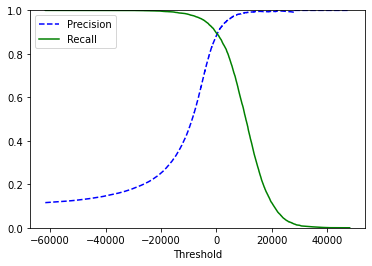

In [34]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Why is the precision curve bumpier than the recall curve? The precision may sometimes go down when you raise the threshold (although in general it will go up).

Notice that when you move the central threshold just one digit to the right, precision goes from 4/5 (80%) down to 3/4 (75%). On the other hand, recall can only go down when the threshold is increased, which explains why its curve looks smooth.

Now, simply select the threshold value that gives you the best precision/recall tradeoff for your task. Another way to select a good precision/recall tradeoff is to plot precision directly against recall, as shown in Figure 3-5.

Precision really starts to fall sharply around 80% recall. You want to select a precision/recall tradeoff just before that drop. For example, at around 60% recall.

Let's say we aim for a 90% precision. You look up the first plot and find that you need to use a threshold of about 70,000. To make predictions (on the training set for now), instead of calling the classifier's `predict()` mehod, you can use the following code:

In [50]:
y_train_pred_90 = (y_scores > 1000)

Let's check the predictions' precision and recall:

In [53]:
print(precision_score(y_train_7, y_train_pred_90))
print(recall_score(y_train_7, y_train_pred_90))

0.9092558983666061
0.8796488427773343


As you can see, it is easy to create a classifier with virtually any precision you want: just set a high enough threshold, and you're done. However, a high-precision classifier is not very useful if its recall is too low.

In other words, if someone says, "let's reach 99% precision," you should ask, "at what recall?"

# The ROC Curve

The ROC curve is another common tool used with binary classifiers. IT is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the *true positive rate* (another name for recall) against the *false positive rate*. The FPR is the ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the *true negative rate*, which is the ratio of negative instances that are incorrectly classified as negative. The TNR is also called *specificity*. Hence the ROC curve plots *sensitivity* (recall) versus 1 - *specificity*.

To plot the ROC curve, you first need to compute the TPR and FPR for various threshold values, using the `roc_curve()` function.

In [55]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_7, y_scores)

Then you can plot the FPR against the TPR using matplotlib. This code produces the plot below:

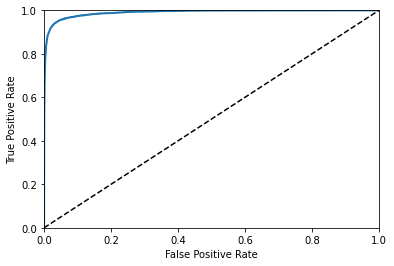

In [56]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.axis([0, 1, 0, 1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

Again, there is a tradeoff, the higher the recall (TPR), the more false positives (FPR) the classifier produces. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

One way to compare classifiers is to measure the *area under the curve* (AUC). A perfect classifier will have a *ROC AUC* equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. `sklearn` provides a function to compute the ROC AUC: